Data Loading

In [5]:
import pandas as pd

data = pd.read_csv('/content/emails.csv')

print(data.head())


                                               email label Unnamed: 2  \
0  Subject: naturally irresistible your corporate...     1        NaN   
1  Subject: the stock trading gunslinger  fanny i...     1        NaN   
2  Subject: unbelievable new homes made easy  im ...     1        NaN   
3  Subject: 4 color printing special  request add...     1        NaN   
4  Subject: do not have money , get software cds ...     1        NaN   

  Unnamed: 3 Unnamed: 4 Unnamed: 5 Unnamed: 6 Unnamed: 7 Unnamed: 8  \
0        NaN        NaN        NaN        NaN        NaN        NaN   
1        NaN        NaN        NaN        NaN        NaN        NaN   
2        NaN        NaN        NaN        NaN        NaN        NaN   
3        NaN        NaN        NaN        NaN        NaN        NaN   
4        NaN        NaN        NaN        NaN        NaN        NaN   

  Unnamed: 9  ... Unnamed: 100 Unnamed: 101 Unnamed: 102 Unnamed: 103  \
0        NaN  ...          NaN          NaN          NaN     

In [6]:

print(data.isnull().sum())
data = data.dropna()

email              0
label              2
Unnamed: 2      5728
Unnamed: 3      5728
Unnamed: 4      5728
                ... 
Unnamed: 105    5728
Unnamed: 106    5728
Unnamed: 107    5729
Unnamed: 108    5729
Unnamed: 109    5729
Length: 110, dtype: int64


Data preprocessing

In [7]:
import nltk
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
from nltk.stem import PorterStemmer
import string
import re

nltk.download('punkt')
nltk.download('stopwords')


stemmer = PorterStemmer()
stop_words = set(stopwords.words('english'))

def preprocess_text(text):

    text = text.lower()
    text = text.translate(str.maketrans('', '', string.punctuation))

    text = re.sub(r'\W+', ' ', text)

    tokens = word_tokenize(text)

    tokens = [stemmer.stem(word) for word in tokens if word not in stop_words]
    return ' '.join(tokens)

data['processed_email'] = data['email'].apply(preprocess_text)


[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [8]:
from sklearn.preprocessing import LabelEncoder

label_encoder = LabelEncoder()


data['label'] = label_encoder.fit_transform(data['label'])


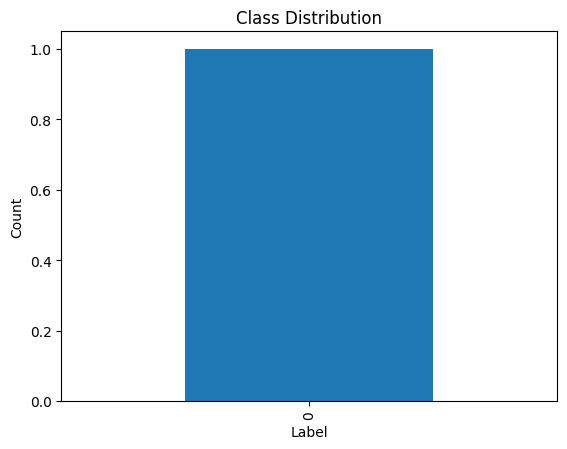

In [9]:
import matplotlib.pyplot as plt

data['label'].value_counts().plot(kind='bar')
plt.xlabel('Label')
plt.ylabel('Count')
plt.title('Class Distribution')
plt.show()


In [10]:

print(data[['email', 'label']].sample(n=1))

                                                  email  label
1381  e dpc contributed only 0 . 7 per  cent of the ...      0


EDA

1. Basic Dataset Information:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5730 entries, 0 to 5729
Columns: 110 entries, email to Unnamed: 109
dtypes: float64(1), object(109)
memory usage: 4.8+ MB
None

Dataset Shape: (5730, 110)

Column Names: ['email', 'label', 'Unnamed: 2', 'Unnamed: 3', 'Unnamed: 4', 'Unnamed: 5', 'Unnamed: 6', 'Unnamed: 7', 'Unnamed: 8', 'Unnamed: 9', 'Unnamed: 10', 'Unnamed: 11', 'Unnamed: 12', 'Unnamed: 13', 'Unnamed: 14', 'Unnamed: 15', 'Unnamed: 16', 'Unnamed: 17', 'Unnamed: 18', 'Unnamed: 19', 'Unnamed: 20', 'Unnamed: 21', 'Unnamed: 22', 'Unnamed: 23', 'Unnamed: 24', 'Unnamed: 25', 'Unnamed: 26', 'Unnamed: 27', 'Unnamed: 28', 'Unnamed: 29', 'Unnamed: 30', 'Unnamed: 31', 'Unnamed: 32', 'Unnamed: 33', 'Unnamed: 34', 'Unnamed: 35', 'Unnamed: 36', 'Unnamed: 37', 'Unnamed: 38', 'Unnamed: 39', 'Unnamed: 40', 'Unnamed: 41', 'Unnamed: 42', 'Unnamed: 43', 'Unnamed: 44', 'Unnamed: 45', 'Unnamed: 46', 'Unnamed: 47', 'Unnamed: 48', 'Unnamed: 49', 'Unnamed: 50', 'Unn

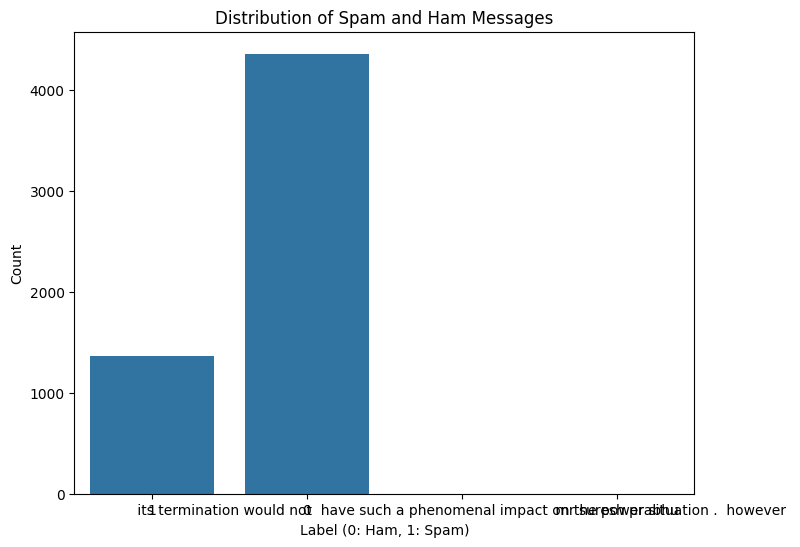


3. Message Length Statistics:
                                                     count         mean  \
label                                                                     
 its termination would not  have such a phenome...     1.0    81.000000   
 mr suresh prabhu                                      1.0   121.000000   
0                                                   4358.0  1612.499771   
1                                                   1368.0  1317.257310   

                                                            std    min  \
label                                                                    
 its termination would not  have such a phenome...          NaN   81.0   
 mr suresh prabhu                                           NaN  121.0   
0                                                   1737.769180   13.0   
1                                                   2271.372893   18.0   

                                                       25%     50%      7

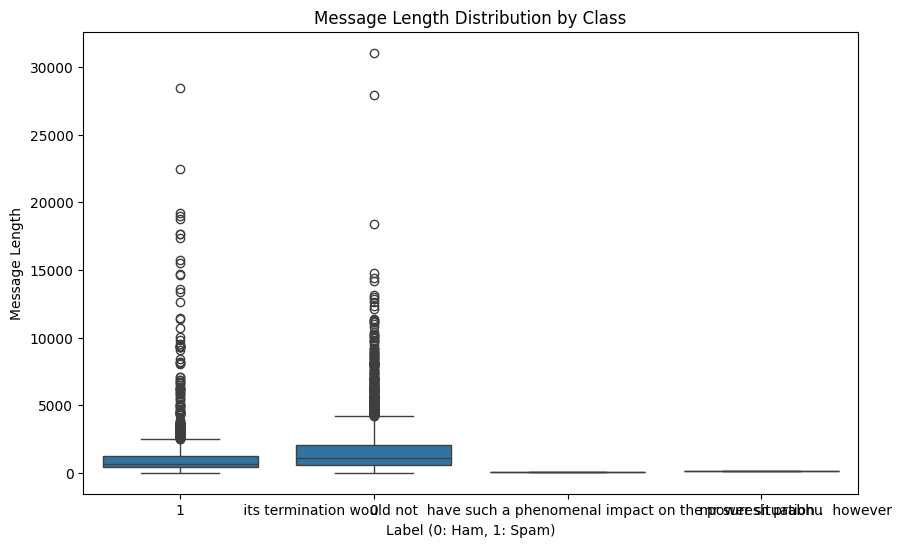


4. Word Count Statistics:
                                                     count        mean  \
label                                                                    
 its termination would not  have such a phenome...     1.0   17.000000   
 mr suresh prabhu                                      1.0   22.000000   
0                                                   4358.0  342.099128   
1                                                   1368.0  266.432749   

                                                           std   min    25%  \
label                                                                         
 its termination would not  have such a phenome...         NaN  17.0   17.0   
 mr suresh prabhu                                          NaN  22.0   22.0   
0                                                   367.588530   2.0  119.0   
1                                                   451.461674   4.0   79.0   

                                                     

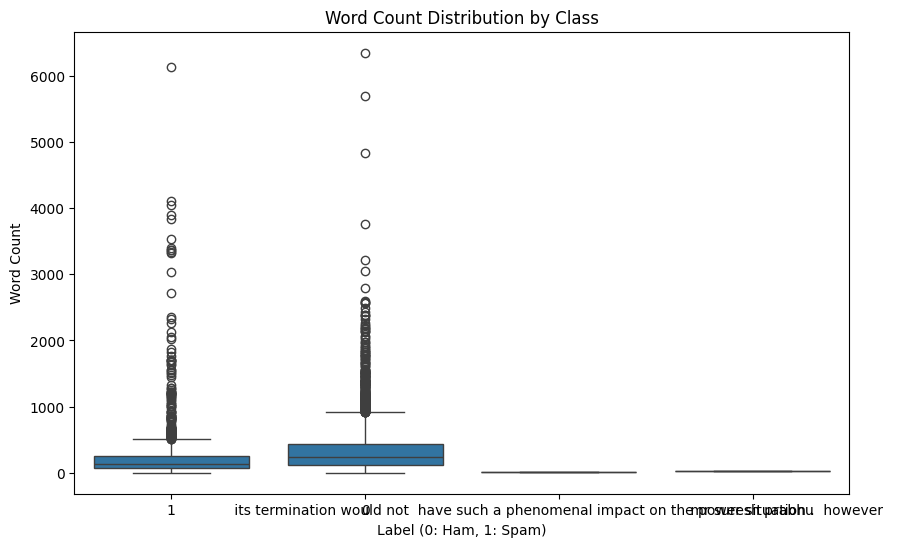


7. Character Type Analysis:
                                                    uppercase    lowercase  \
label                                                                        
 its termination would not  have such a phenome...        0.0    60.000000   
 mr suresh prabhu                                         0.0    98.000000   
0                                                         1.0  1104.270996   
1                                                         1.0   943.024854   

                                                       digits     special  
label                                                                      
 its termination would not  have such a phenome...   2.000000   19.000000  
 mr suresh prabhu                                    0.000000   23.000000  
0                                                   41.128729  466.100046  
1                                                   24.644006  348.588450  


<Figure size 1200x600 with 0 Axes>

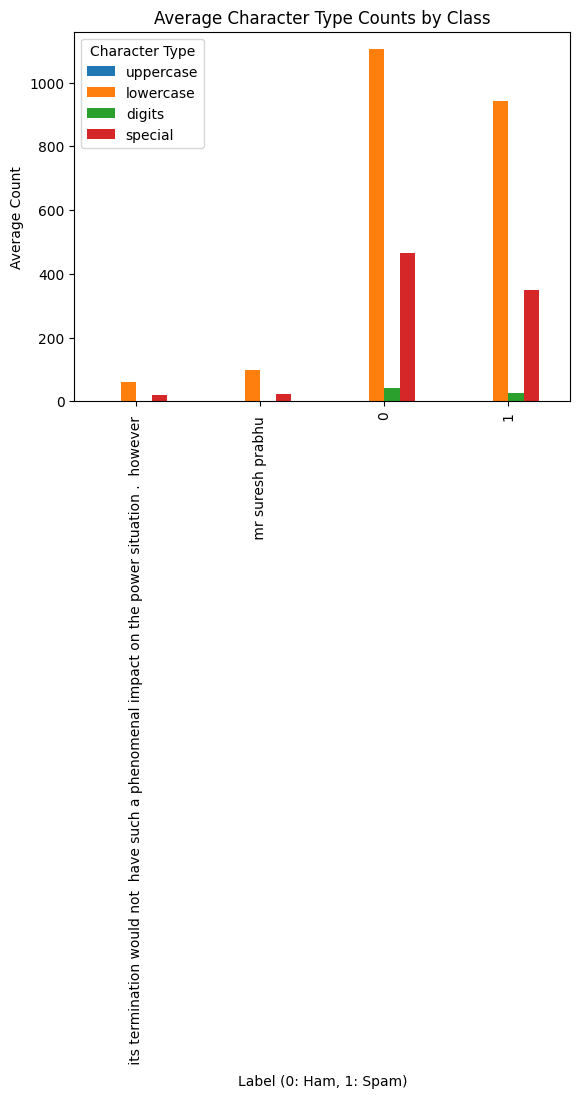


EDA Complete. Please review the generated plots and statistics.


In [12]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.feature_extraction.text import CountVectorizer
from wordcloud import WordCloud
from collections import Counter
import re


df = pd.read_csv('/content/emails.csv')

print("1. Basic Dataset Information:")
print(df.info())
print("\nDataset Shape:", df.shape)
print("\nColumn Names:", df.columns.tolist())
print("\nMissing Values:\n", df.isnull().sum())
print("\nDuplicate Rows:", df.duplicated().sum())


print("\n2. Label Distribution:")
label_counts = df['label'].value_counts()
print(label_counts)
plt.figure(figsize=(8, 6))
sns.countplot(x='label', data=df)
plt.title('Distribution of Spam and Ham Messages')
plt.xlabel('Label (0: Ham, 1: Spam)')
plt.ylabel('Count')
plt.show()

df['message_length'] = df['email'].str.len()
print("\n3. Message Length Statistics:")
print(df.groupby('label')['message_length'].describe())

plt.figure(figsize=(10, 6))
sns.boxplot(x='label', y='message_length', data=df)
plt.title('Message Length Distribution by Class')
plt.xlabel('Label (0: Ham, 1: Spam)')
plt.ylabel('Message Length')
plt.show()
df['word_count'] = df['email'].apply(lambda x: len(str(x).split()))
print("\n4. Word Count Statistics:")
print(df.groupby('label')['word_count'].describe())

plt.figure(figsize=(10, 6))
sns.boxplot(x='label', y='word_count', data=df)
plt.title('Word Count Distribution by Class')
plt.xlabel('Label (0: Ham, 1: Spam)')
plt.ylabel('Word Count')
plt.show()

def count_char_types(text):
    return {
        'uppercase': sum(1 for c in text if c.isupper()),
        'lowercase': sum(1 for c in text if c.islower()),
        'digits': sum(1 for c in text if c.isdigit()),
        'special': sum(1 for c in text if not c.isalnum())
    }

char_type_counts = df['email'].apply(count_char_types).apply(pd.Series)
df = pd.concat([df, char_type_counts], axis=1)

print("\n7. Character Type Analysis:")
print(df.groupby('label')[['uppercase', 'lowercase', 'digits', 'special']].mean())

plt.figure(figsize=(12, 6))
df.groupby('label')[['uppercase', 'lowercase', 'digits', 'special']].mean().plot(kind='bar')
plt.title('Average Character Type Counts by Class')
plt.xlabel('Label (0: Ham, 1: Spam)')
plt.ylabel('Average Count')
plt.legend(title='Character Type')
plt.show()

df['url_count'] = df['email'].apply(lambda x: len(re.findall(r'http[s]?://(?:[a-zA-Z]|[0-9]|[$-_@.&+]|[!*\\(\\),]|(?:%[0-9a-fA-F][0-9a-fA-F]))+', x)))
df['email_count'] = df['email'].apply(lambda x: len(re.findall(r'\b[A-Za-z0-9._%+-]+@[A-Za-z0-9.-]+\.[A-Z|a-z]{2,}\b', x)))




# 10. Time Series Analysis (if timestamp is available)
if 'timestamp' in df.columns:
    df['timestamp'] = pd.to_datetime(df['timestamp'])
    df['hour'] = df['timestamp'].dt.hour
    df['day_of_week'] = df['timestamp'].dt.dayofweek

    plt.figure(figsize=(12, 6))
    sns.countplot(x='hour', hue='label', data=df)
    plt.title('Distribution of Messages by Hour of Day')
    plt.xlabel('Hour of Day')
    plt.ylabel('Count')
    plt.legend(title='Label', labels=['Ham', 'Spam'])
    plt.show()

    plt.figure(figsize=(12, 6))
    sns.countplot(x='day_of_week', hue='label', data=df)
    plt.title('Distribution of Messages by Day of Week')
    plt.xlabel('Day of Week (0: Monday, 6: Sunday)')
    plt.ylabel('Count')
    plt.legend(title='Label', labels=['Ham', 'Spam'])
    plt.show()

print("\nEDA Complete. Please review the generated plots and statistics.")


In [15]:
from sklearn.preprocessing import LabelEncoder

le = LabelEncoder()
df['label_encoded'] = le.fit_transform(df['label'])

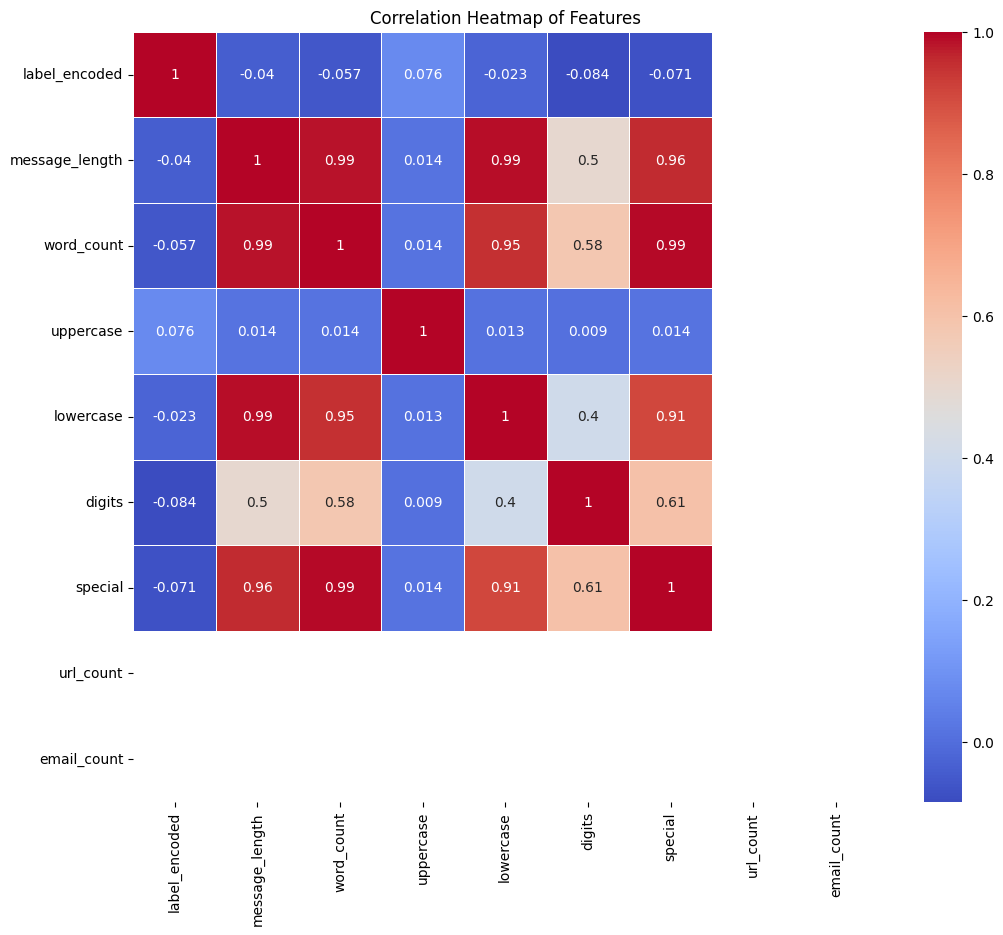

In [16]:
correlation_matrix = df[['label_encoded', 'message_length', 'word_count',
                         'uppercase', 'lowercase', 'digits',
                         'special', 'url_count', 'email_count']].corr()

plt.figure(figsize=(12, 10))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', linewidths=0.5)
plt.title('Correlation Heatmap of Features')
plt.show()

In [ ]:
from collections import Counter


all_tokens = ' '.join(data['processed_email']).split()
token_freq = Counter(all_tokens)


print(token_freq.most_common(20))


[('e', 1), ('dpc', 1), ('contribut', 1), ('0', 1), ('7', 1), ('per', 1), ('cent', 1), ('total', 1), ('energi', 1), ('output', 1), ('countri', 1)]


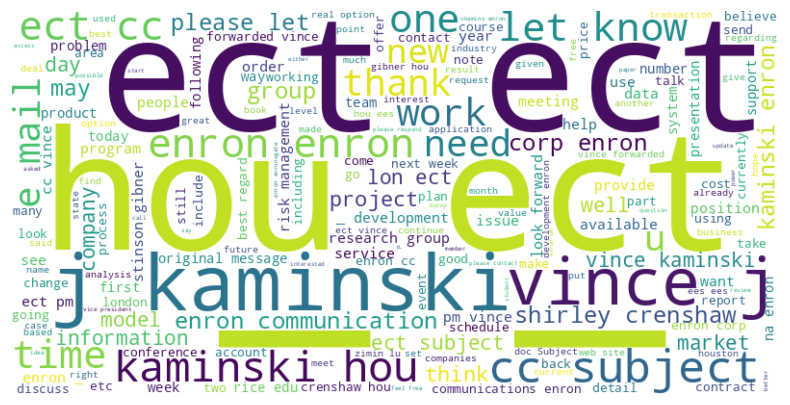

In [ ]:
import pandas as pd
from wordcloud import WordCloud
import matplotlib.pyplot as plt
from nltk.corpus import stopwords


df = pd.read_csv('/content/emails.csv')


all_emails = ' '.join(df['email'])


stop_words = set(stopwords.words('english'))
words = [word for word in all_emails.split() if word not in stop_words]
filtered_text = ' '.join(words)


wordcloud = WordCloud(width=800, height=400, background_color='white').generate(filtered_text)

plt.figure(figsize=(10, 5))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.show()

In [ ]:
import pandas as pd
from wordcloud import WordCloud
import matplotlib.pyplot as plt
from nltk.corpus import stopwords
from collections import Counter

!pip install nltk
import nltk
nltk.download('stopwords')
df = pd.read_csv('/content/emails.csv')
spam_emails = df[df['label'] == 1]['email']
non_spam_emails = df[df['label'] == 0]['email']

def preprocess_and_count(emails):
    text = ' '.join(emails)
    stop_words = set(stopwords.words('english'))
    words = [word for word in text.split() if word.lower() not in stop_words] # Convert words to lowercase for better stop word removal
    word_counts = Counter(words)
    return word_counts

spam_word_counts = preprocess_and_count(spam_emails)
non_spam_word_counts = preprocess_and_count(non_spam_emails)

if len(spam_word_counts) > 0:
    top_spam_words = spam_word_counts.most_common(20)
    print("Top 20 words for spam:")
    for word, count in top_spam_words:
        print(f"{word}: {count}")
    spam_wordcloud = WordCloud(width=800, height=400, background_color='white').generate_from_frequencies(dict(top_spam_words))

    plt.figure(figsize=(10, 5))
    plt.imshow(spam_wordcloud, interpolation='bilinear')
    plt.axis('off')
    plt.show()
else:
    print("No words left in spam emails after preprocessing.")

if len(non_spam_word_counts) > 0:

    top_non_spam_words = non_spam_word_counts.most_common(20)
    print("\nTop 20 words for non-spam:")
    for word, count in top_non_spam_words:
        print(f"{word}: {count}")
    non_spam_wordcloud = WordCloud(width=800, height=400, background_color='white').generate_from_frequencies(dict(top_non_spam_words))

    plt.figure(figsize=(10, 5))
    plt.imshow(non_spam_wordcloud, interpolation='bilinear')
    plt.axis('off')
    plt.show()
else:
    print("No words left in non-spam emails after preprocessing.")

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


No words left in spam emails after preprocessing.
No words left in non-spam emails after preprocessing.


In [ ]:
!huggingface-cli login


    _|    _|  _|    _|    _|_|_|    _|_|_|  _|_|_|  _|      _|    _|_|_|      _|_|_|_|    _|_|      _|_|_|  _|_|_|_|
    _|    _|  _|    _|  _|        _|          _|    _|_|    _|  _|            _|        _|    _|  _|        _|
    _|_|_|_|  _|    _|  _|  _|_|  _|  _|_|    _|    _|  _|  _|  _|  _|_|      _|_|_|    _|_|_|_|  _|        _|_|_|
    _|    _|  _|    _|  _|    _|  _|    _|    _|    _|    _|_|  _|    _|      _|        _|    _|  _|        _|
    _|    _|    _|_|      _|_|_|    _|_|_|  _|_|_|  _|      _|    _|_|_|      _|        _|    _|    _|_|_|  _|_|_|_|

    To login, `huggingface_hub` requires a token generated from https://huggingface.co/settings/tokens .
Enter your token (input will not be visible): 
Add token as git credential? (Y/n) n
Token is valid (permission: write).
Your token has been saved to /root/.cache/huggingface/token
Login successful


Fine Tunning


In [ ]:
import pandas as pd
from sklearn.model_selection import train_test_split
from transformers import AutoTokenizer, AutoModelForSequenceClassification, Trainer, TrainingArguments
from torch.utils.data import DataLoader, Dataset
import torch

tokenizer = AutoTokenizer.from_pretrained("jerry124/spam-ham-classifier")
model = AutoModelForSequenceClassification.from_pretrained("jerry124/spam-ham-classifier")


df = pd.read_csv('/content/emails.csv')

print("Unique values in 'label' column before cleaning:", df['label'].unique())

def clean_labels(label):
    try:
        return int(label)
    except ValueError:
        return None

df['label'] = df['label'].apply(clean_labels)
df = df.dropna(subset=['label'])
df['label'] = df['label'].astype(int)
print("Unique values in 'label' column after cleaning:", df['label'].unique())


train_df, val_df = train_test_split(df, test_size=0.2, stratify=df['label'], random_state=42)


class EmailDataset(Dataset):
    def __init__(self, dataframe, tokenizer, max_len):
        self.df = dataframe
        self.tokenizer = tokenizer
        self.max_len = max_len

    def __len__(self):
        return len(self.df)

    def __getitem__(self, idx):
        row = self.df.iloc[idx]
        email = row['email']
        label = row['label']
        encoding = self.tokenizer.encode_plus(
            email,
            add_special_tokens=True,
            max_length=self.max_len,
            return_token_type_ids=False,
            padding='max_length',
            truncation=True,
            return_attention_mask=True,
            return_tensors='pt'
        )
        return {
            'input_ids': encoding['input_ids'].flatten(),
            'attention_mask': encoding['attention_mask'].flatten(),
            'labels': torch.tensor(label, dtype=torch.long)
        }


MAX_LEN = 64
BATCH_SIZE = 4


train_dataset = EmailDataset(train_df, tokenizer, MAX_LEN)
val_dataset = EmailDataset(val_df, tokenizer, MAX_LEN)

train_dataloader = DataLoader(train_dataset, batch_size=BATCH_SIZE, shuffle=True)
val_dataloader = DataLoader(val_dataset, batch_size=BATCH_SIZE)


training_args = TrainingArguments(
    output_dir='./results',
    evaluation_strategy='epoch',
    learning_rate=2e-5,
    per_device_train_batch_size=BATCH_SIZE,
    per_device_eval_batch_size=BATCH_SIZE,
    num_train_epochs=2,
    weight_decay=0.01,
    logging_dir='./logs',
    logging_steps=10,
    gradient_accumulation_steps=2
)

trainer = Trainer(
    model=model,
    args=training_args,
    train_dataset=train_dataset,
    eval_dataset=val_dataset,
)


trainer.train()



Unique values in 'label' column before cleaning: ['1' '0' nan
 ' its termination would not  have such a phenomenal impact on the power situation .  however '
 ' mr suresh prabhu ']
Unique values in 'label' column after cleaning: [1 0]


/usr/local/lib/python3.10/dist-packages/transformers/training_args.py:1494: FutureWarning: `evaluation_strategy` is deprecated and will be removed in version 4.46 of 🤗 Transformers. Use `eval_strategy` instead
  warnings.warn(


Epoch,Training Loss,Validation Loss
0,0.008800,0.040926
1,0.000100,0.023526


TrainOutput(global_step=1144, training_loss=0.08416503668645514, metrics={'train_runtime': 8149.3187, 'train_samples_per_second': 1.124, 'train_steps_per_second': 0.14, 'total_flos': 300999047331840.0, 'train_loss': 0.08416503668645514, 'epoch': 1.9982532751091702})

MOdel Evaluation

In [ ]:

results = trainer.evaluate()
print("Evaluation results:", results)


Evaluation results: {'eval_loss': 0.023526491597294807, 'eval_runtime': 342.0865, 'eval_samples_per_second': 3.35, 'eval_steps_per_second': 0.839, 'epoch': 1.9982532751091702}


Saving the Model

In [ ]:

model.save_pretrained('/content/fine-tuned-spam-ham-classifier')
tokenizer.save_pretrained('/content/fine-tuned-spam-ham-classifier')


('/content/fine-tuned-spam-ham-classifier/tokenizer_config.json',
 '/content/fine-tuned-spam-ham-classifier/special_tokens_map.json',
 '/content/fine-tuned-spam-ham-classifier/vocab.txt',
 '/content/fine-tuned-spam-ham-classifier/added_tokens.json',
 '/content/fine-tuned-spam-ham-classifier/tokenizer.json')

Classifictaion Report

In [ ]:
from sklearn.metrics import classification_report
import numpy as np
from tqdm import tqdm

def get_predictions(trainer, dataloader):
    trainer.model.eval()
    predictions, true_labels = [], []

    for batch in tqdm(dataloader, desc="Processing batches"):
        with torch.no_grad():
            outputs = trainer.model(input_ids=batch['input_ids'], attention_mask=batch['attention_mask'])
            logits = outputs.logits
            preds = torch.argmax(logits, dim=1).cpu().numpy()
            labels = batch['labels'].cpu().numpy()

            predictions.extend(preds)
            true_labels.extend(labels)

    return np.array(predictions), np.array(true_labels)

preds, labels = get_predictions(trainer, val_dataloader)


report = classification_report(labels, preds, target_names=['Not Spam', 'Spam'])

print(report)


Processing batches: 100%|██████████| 287/287 [04:30<00:00,  1.06it/s]

              precision    recall  f1-score   support

    Not Spam       0.99      1.00      0.99       872
        Spam       0.99      0.98      0.98       274

    accuracy                           0.99      1146
   macro avg       0.99      0.99      0.99      1146
weighted avg       0.99      0.99      0.99      1146



In [ ]:

from tqdm import tqdm
test_df = pd.read_csv('/content/emails.csv')

class TestEmailDataset(Dataset):
    def __init__(self, dataframe, tokenizer, max_len):
        self.df = dataframe
        self.tokenizer = tokenizer
        self.max_len = max_len

    def __len__(self):
        return len(self.df)

    def __getitem__(self, idx):
        row = self.df.iloc[idx]
        email = row['email']
        encoding = self.tokenizer.encode_plus(
            email,
            add_special_tokens=True,
            max_length=self.max_len,
            return_token_type_ids=False,
            padding='max_length',
            truncation=True,
            return_attention_mask=True,
            return_tensors='pt'
        )
        return {
            'input_ids': encoding['input_ids'].flatten(),
            'attention_mask': encoding['attention_mask'].flatten()
        }

test_dataset = TestEmailDataset(test_df, tokenizer, MAX_LEN)
test_dataloader = DataLoader(test_dataset, batch_size=BATCH_SIZE)
def get_test_predictions(trainer, dataloader):
    trainer.model.eval()
    predictions = []

    for batch in tqdm(dataloader, desc="Processing batches"):
        with torch.no_grad():
            outputs = trainer.model(input_ids=batch['input_ids'], attention_mask=batch['attention_mask'])
            logits = outputs.logits
            preds = torch.argmax(logits, dim=1).cpu().numpy()
            predictions.extend(preds)

    return np.array(predictions)


test_preds = get_test_predictions(trainer, test_dataloader)

if 'label' in test_df.columns:
    true_test_labels = test_df['label'].values
    report = classification_report(true_test_labels, test_preds, target_names=['Not Spam', 'Spam'])
    print("Test Classification Report:\n", report)
else:

    print("Test Predictions:", test_preds)


Processing batches: 100%|██████████| 1433/1433 [21:35<00:00,  1.11it/s]


TypeError: '<' not supported between instances of 'float' and 'str'

Test Classification Report:
               precision    recall  f1-score   support

    Not Spam       0.97      1.00      0.98       856
        Spam       0.99      0.91      0.95       290

    accuracy                           0.97      1146
   macro avg       0.98      0.95      0.97      1146
weighted avg       0.98      0.97      0.97      1146



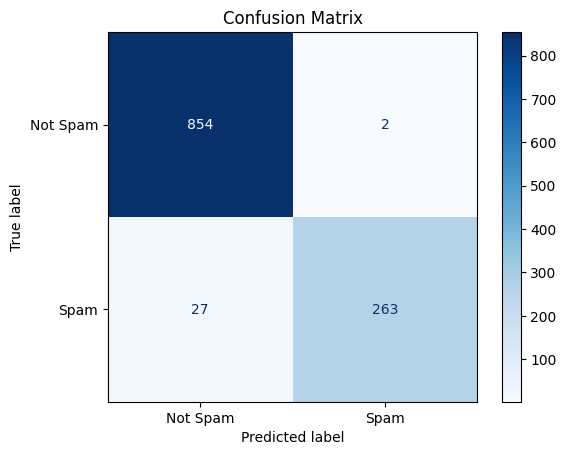

In [ ]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import classification_report, confusion_matrix, ConfusionMatrixDisplay
import matplotlib.pyplot as plt
from tqdm import tqdm
df = pd.read_csv('/content/emails.csv')
def clean_labels(label):
    try:
        return int(label)
    except ValueError:
        return None
df['label'] = df['label'].apply(clean_labels)

df = df.dropna(subset=['label'])

df['label'] = df['label'].astype(int)
X_train, X_test, y_train, y_test = train_test_split(df['email'], df['label'], test_size=0.2, random_state=42)
tfidf_vectorizer = TfidfVectorizer(max_features=5000)
X_train_tfidf = tfidf_vectorizer.fit_transform(X_train)
X_test_tfidf = tfidf_vectorizer.transform(X_test)
model = MultinomialNB()
model.fit(X_train_tfidf, y_train)
test_preds = model.predict(X_test_tfidf)
test_preds = test_preds[:len(y_test)]
report = classification_report(y_test, test_preds, target_names=['Not Spam', 'Spam'])
print("Test Classification Report:\n", report)
cm = confusion_matrix(y_test, test_preds)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=['Not Spam', 'Spam'])
disp.plot(cmap=plt.cm.Blues)
plt.title('Confusion Matrix')
plt.show()

Model Testing

In [ ]:
import torch
from tqdm import tqdm
random_emails = [
    "Congratulations! You've won a free iPhone. Click here to claim your prize.",
    "Meeting tomorrow at 10 AM in the conference room. Don't forget to bring the report.",
    "Urgent: Your account has been compromised. Please reset your password immediately.",
    "Reminder: Your dental appointment is scheduled for next Wednesday at 3 PM.",
    "Subject: spice up your cellphone with a wallpaper from dirtyhippo .  dress up your phone . visit here .  dxndeueqjdzo"
]

class RandomEmailDataset(Dataset):
    def __init__(self, emails, tokenizer, max_len):
        self.emails = emails
        self.tokenizer = tokenizer
        self.max_len = max_len

    def __len__(self):
        return len(self.emails)

    def __getitem__(self, idx):
        email = self.emails[idx]
        encoding = self.tokenizer.encode_plus(
            email,
            add_special_tokens=True,
            max_length=self.max_len,
            return_token_type_ids=False,
            padding='max_length',
            truncation=True,
            return_attention_mask=True,
            return_tensors='pt'
        )
        return {
            'input_ids': encoding['input_ids'].flatten(),
            'attention_mask': encoding['attention_mask'].flatten()
        }
random_email_dataset = RandomEmailDataset(random_emails, tokenizer, MAX_LEN)
random_email_dataloader = DataLoader(random_email_dataset, batch_size=1)

def predict_random_emails(trainer, dataloader):
    trainer.model.eval()
    predictions = []

    for batch in dataloader:
        with torch.no_grad():
            outputs = trainer.model(input_ids=batch['input_ids'], attention_mask=batch['attention_mask'])
            logits = outputs.logits
            preds = torch.argmax(logits, dim=1).cpu().numpy()
            predictions.extend(preds)

    return np.array(predictions)

random_email_preds = predict_random_emails(trainer, random_email_dataloader)

for i, email in enumerate(random_emails):
    print(f"Email: {email}\nPrediction: {'Spam (1)' if random_email_preds[i] == 1 else 'Not Spam (0)'}\n")


Email: Congratulations! You've won a free iPhone. Click here to claim your prize.
Prediction: Spam (1)

Email: Meeting tomorrow at 10 AM in the conference room. Don't forget to bring the report.
Prediction: Not Spam (0)

Email: Urgent: Your account has been compromised. Please reset your password immediately.
Prediction: Spam (1)

Email: Reminder: Your dental appointment is scheduled for next Wednesday at 3 PM.
Prediction: Not Spam (0)

Email: Subject: spice up your cellphone with a wallpaper from dirtyhippo .  dress up your phone . visit here .  dxndeueqjdzo
Prediction: Spam (1)



In [ ]:
print("Length of true_test_labels:", len(true_test_labels))
print("Length of test_preds:", len(test_preds))


Length of true_test_labels: 5726
Length of test_preds: 1146


Model Analysis

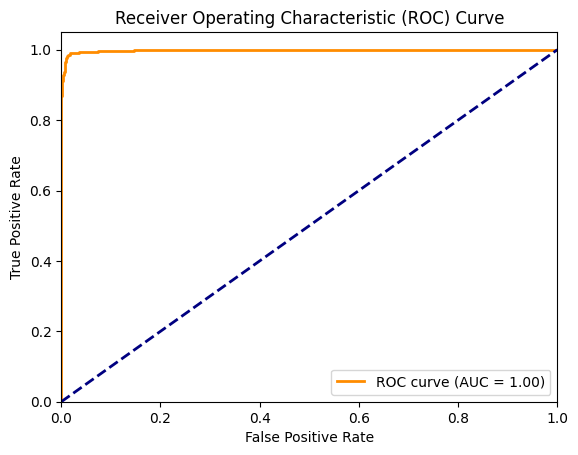

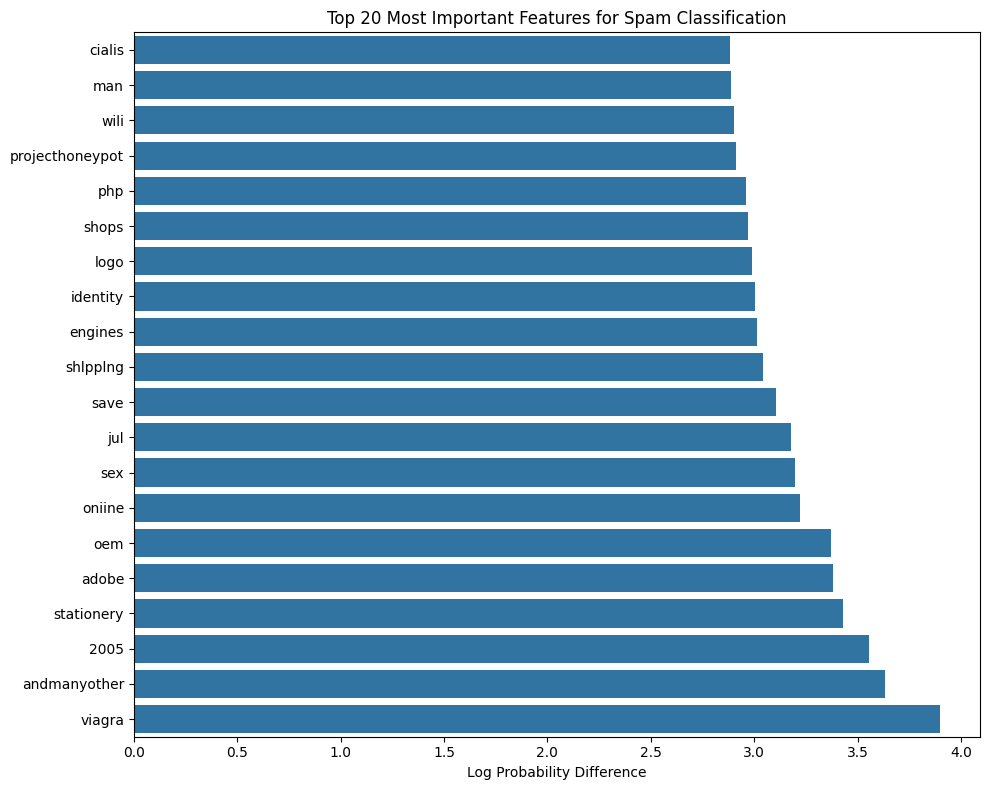

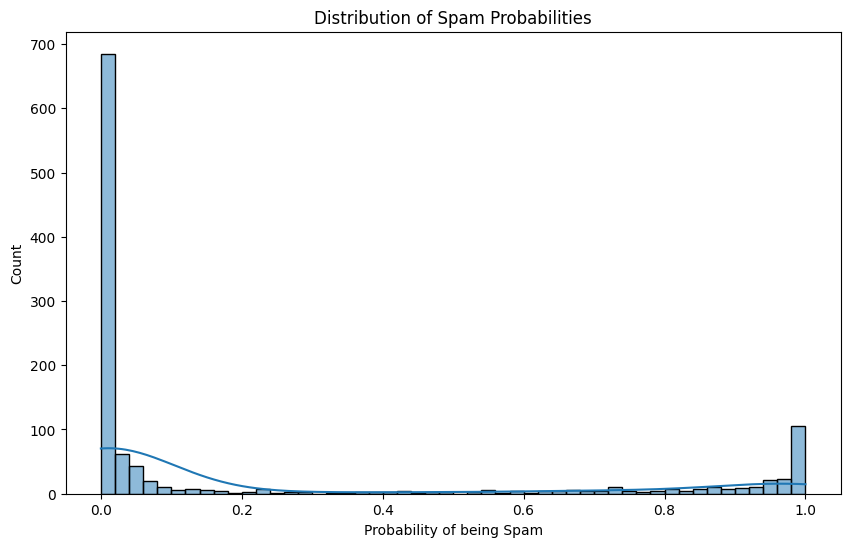

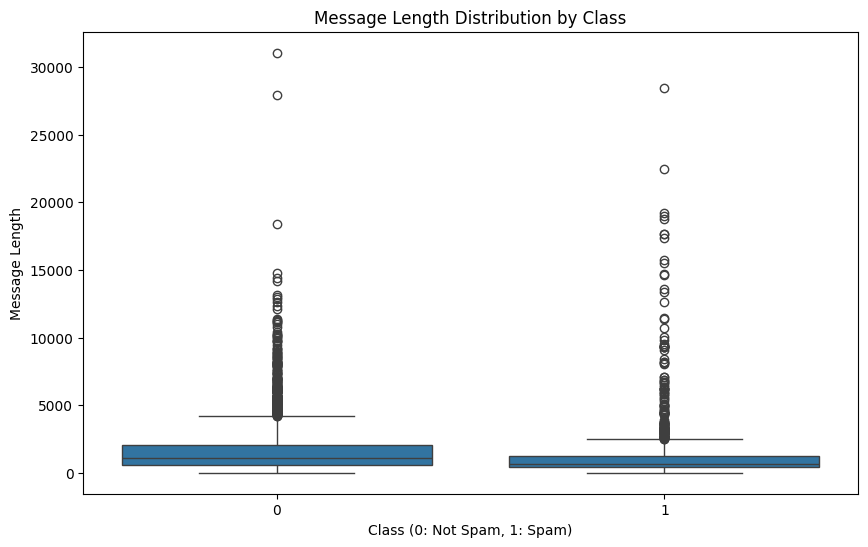

/usr/local/lib/python3.10/dist-packages/joblib/externals/loky/backend/fork_exec.py:38: RuntimeWarning: os.fork() was called. os.fork() is incompatible with multithreaded code, and JAX is multithreaded, so this will likely lead to a deadlock.
  pid = os.fork()


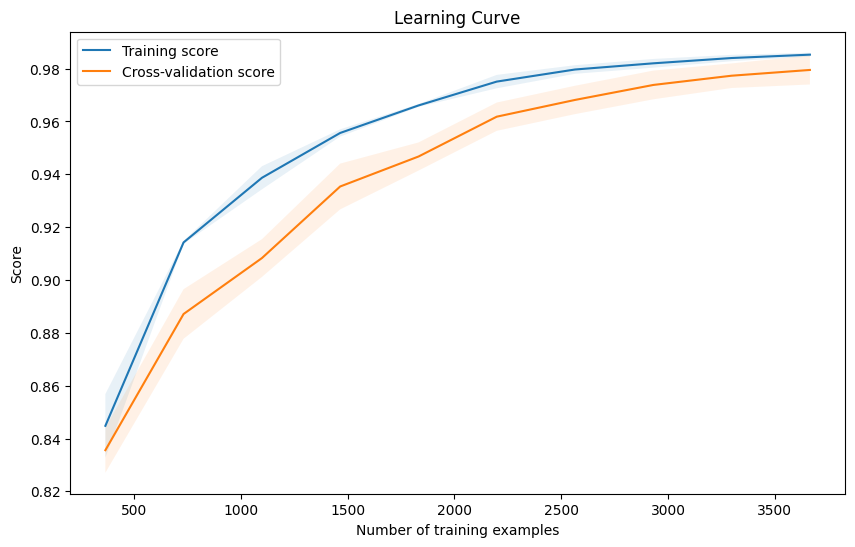

In [ ]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split,learning_curve
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import classification_report, confusion_matrix, ConfusionMatrixDisplay, roc_curve, auc
import matplotlib.pyplot as plt
import seaborn as sns

fpr, tpr, _ = roc_curve(y_test, model.predict_proba(X_test_tfidf)[:, 1])
roc_auc = auc(fpr, tpr)
plt.figure()
plt.plot(fpr, tpr, color='darkorange', lw=2, label=f'ROC curve (AUC = {roc_auc:.2f})')
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc="lower right")
plt.show()


feature_importance = model.feature_log_prob_[1] - model.feature_log_prob_[0]
top_features = np.argsort(feature_importance)[-20:]  # Top 20 features
feature_names = np.array(tfidf_vectorizer.get_feature_names_out())[top_features]

plt.figure(figsize=(10, 8))
sns.barplot(x=feature_importance[top_features], y=feature_names)
plt.title('Top 20 Most Important Features for Spam Classification')
plt.xlabel('Log Probability Difference')
plt.tight_layout()
plt.show()

spam_probs = model.predict_proba(X_test_tfidf)[:, 1]
plt.figure(figsize=(10, 6))
sns.histplot(spam_probs, bins=50, kde=True)
plt.title('Distribution of Spam Probabilities')
plt.xlabel('Probability of being Spam')
plt.ylabel('Count')
plt.show()

df['message_length'] = df['email'].str.len()
plt.figure(figsize=(10, 6))
sns.boxplot(x='label', y='message_length', data=df)
plt.title('Message Length Distribution by Class')
plt.xlabel('Class (0: Not Spam, 1: Spam)')
plt.ylabel('Message Length')
plt.show()



train_sizes, train_scores, test_scores = learning_curve(
    MultinomialNB(), X_train_tfidf, y_train, cv=5, n_jobs=-1,
    train_sizes=np.linspace(0.1, 1.0, 10))

train_mean = np.mean(train_scores, axis=1)
train_std = np.std(train_scores, axis=1)
test_mean = np.mean(test_scores, axis=1)
test_std = np.std(test_scores, axis=1)

plt.figure(figsize=(10, 6))
plt.plot(train_sizes, train_mean, label='Training score')
plt.plot(train_sizes, test_mean, label='Cross-validation score')
plt.fill_between(train_sizes, train_mean - train_std, train_mean + train_std, alpha=0.1)
plt.fill_between(train_sizes, test_mean - test_std, test_mean + test_std, alpha=0.1)
plt.xlabel('Number of training examples')
plt.ylabel('Score')
plt.title('Learning Curve')
plt.legend(loc='best')
plt.show()

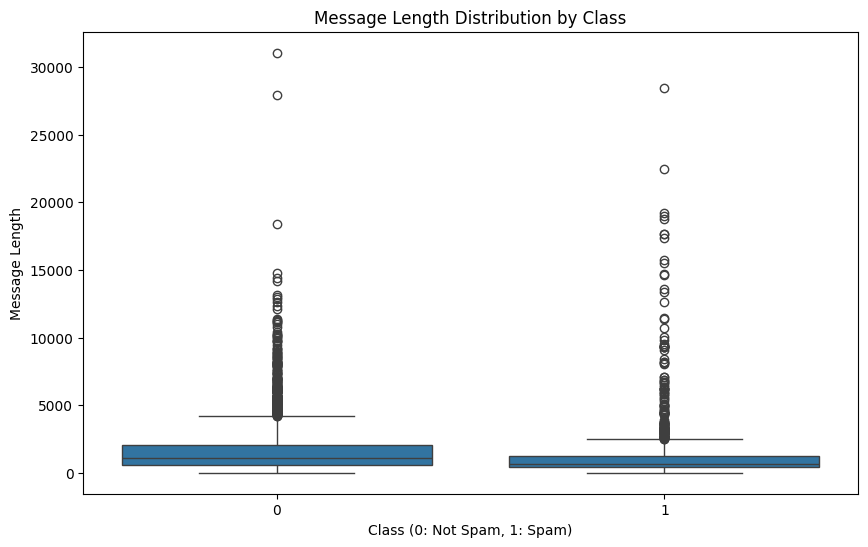

In [ ]:

df['message_length'] = df['email'].str.len()
plt.figure(figsize=(10, 6))
sns.boxplot(x='label', y='message_length', data=df)
plt.title('Message Length Distribution by Class')
plt.xlabel('Class (0: Not Spam, 1: Spam)')
plt.ylabel('Message Length')
plt.show()

/usr/local/lib/python3.10/dist-packages/joblib/externals/loky/backend/fork_exec.py:38: RuntimeWarning: os.fork() was called. os.fork() is incompatible with multithreaded code, and JAX is multithreaded, so this will likely lead to a deadlock.
  pid = os.fork()


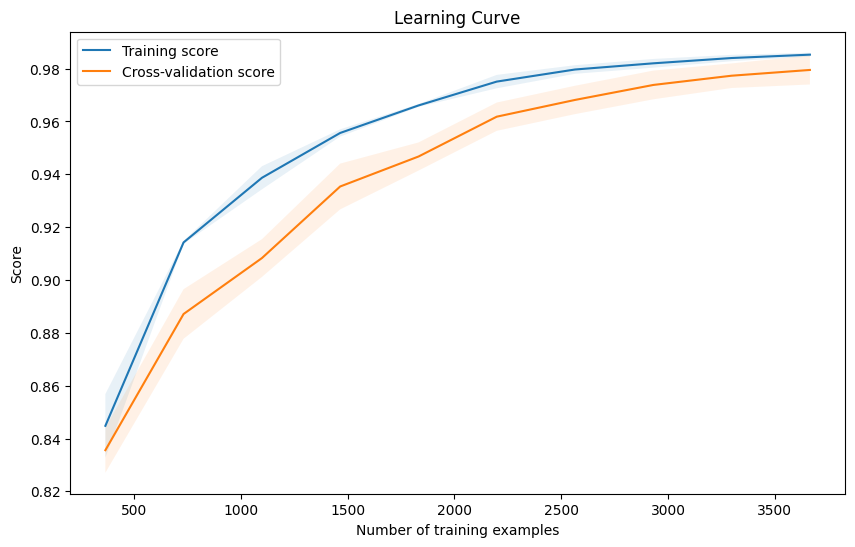

In [ ]:
from sklearn.model_selection import learning_curve
train_sizes, train_scores, test_scores = learning_curve(
    MultinomialNB(), X_train_tfidf, y_train, cv=5, n_jobs=-1,
    train_sizes=np.linspace(0.1, 1.0, 10))

train_mean = np.mean(train_scores, axis=1)
train_std = np.std(train_scores, axis=1)
test_mean = np.mean(test_scores, axis=1)
test_std = np.std(test_scores, axis=1)

plt.figure(figsize=(10, 6))
plt.plot(train_sizes, train_mean, label='Training score')
plt.plot(train_sizes, test_mean, label='Cross-validation score')
plt.fill_between(train_sizes, train_mean - train_std, train_mean + train_std, alpha=0.1)
plt.fill_between(train_sizes, test_mean - test_std, test_mean + test_std, alpha=0.1)
plt.xlabel('Number of training examples')
plt.ylabel('Score')
plt.title('Learning Curve')
plt.legend(loc='best')
plt.show()

In [ ]:
!pip install transformers huggingface_hub


In [ ]:
!huggingface-cli login


    _|    _|  _|    _|    _|_|_|    _|_|_|  _|_|_|  _|      _|    _|_|_|      _|_|_|_|    _|_|      _|_|_|  _|_|_|_|
    _|    _|  _|    _|  _|        _|          _|    _|_|    _|  _|            _|        _|    _|  _|        _|
    _|_|_|_|  _|    _|  _|  _|_|  _|  _|_|    _|    _|  _|  _|  _|  _|_|      _|_|_|    _|_|_|_|  _|        _|_|_|
    _|    _|  _|    _|  _|    _|  _|    _|    _|    _|    _|_|  _|    _|      _|        _|    _|  _|        _|
    _|    _|    _|_|      _|_|_|    _|_|_|  _|_|_|  _|      _|    _|_|_|      _|        _|    _|    _|_|_|  _|_|_|_|

    A token is already saved on your machine. Run `huggingface-cli whoami` to get more information or `huggingface-cli logout` if you want to log out.
    Setting a new token will erase the existing one.
    To login, `huggingface_hub` requires a token generated from https://huggingface.co/settings/tokens .
Enter your token (input will not be visible): 
Add token as git credential? (Y/n) n
Token is valid (permission: write)

Uploading to Huggingface

In [ ]:
from transformers import AutoTokenizer, AutoModelForSequenceClassification
model = AutoModelForSequenceClassification.from_pretrained('/content/fine-tuned-spam-ham-classifier')
tokenizer = AutoTokenizer.from_pretrained('/content/fine-tuned-spam-ham-classifier')


In [ ]:
from huggingface_hub import HfFolder
token = HfFolder.get_token()
model.push_to_hub("jerry124/finetuned_spam_ham_classifier", use_auth_token=token)

model.safetensors:   0%|          | 0.00/438M [00:00<?, ?B/s]

CommitInfo(commit_url='https://huggingface.co/jerry124/finetuned_spam_ham_classifier/commit/b3134736b2bac3e8d40c3b2efeeb9293ce9dc5b1', commit_message='Upload BertForSequenceClassification', commit_description='', oid='b3134736b2bac3e8d40c3b2efeeb9293ce9dc5b1', pr_url=None, pr_revision=None, pr_num=None)